РК №2

Ханунов Г.И иу5-65
Вариант 15

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
import plotly
import missingno as msno
from numpy import nan
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Загрузим датасет, просмотрим инфо

In [58]:
df = pd.read_csv('states_all.csv')

In [59]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [60]:
df.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [61]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}: {} - {}%'.format(col, df[col].isna().sum(), round(pct_missing*100, 2)))

PRIMARY_KEY: 0 - 0.0%
STATE: 0 - 0.0%
YEAR: 0 - 0.0%
ENROLL: 491 - 28.63%
TOTAL_REVENUE: 440 - 25.66%
FEDERAL_REVENUE: 440 - 25.66%
STATE_REVENUE: 440 - 25.66%
LOCAL_REVENUE: 440 - 25.66%
TOTAL_EXPENDITURE: 440 - 25.66%
INSTRUCTION_EXPENDITURE: 440 - 25.66%
SUPPORT_SERVICES_EXPENDITURE: 440 - 25.66%
OTHER_EXPENDITURE: 491 - 28.63%
CAPITAL_OUTLAY_EXPENDITURE: 440 - 25.66%
GRADES_PK_G: 173 - 10.09%
GRADES_KG_G: 83 - 4.84%
GRADES_4_G: 83 - 4.84%
GRADES_8_G: 83 - 4.84%
GRADES_12_G: 83 - 4.84%
GRADES_1_8_G: 695 - 40.52%
GRADES_9_12_G: 644 - 37.55%
GRADES_ALL_G: 83 - 4.84%
AVG_MATH_4_SCORE: 1150 - 67.06%
AVG_MATH_8_SCORE: 1113 - 64.9%
AVG_READING_4_SCORE: 1065 - 62.1%
AVG_READING_8_SCORE: 1153 - 67.23%


Обработка пропусков.

In [62]:
df.drop(['PRIMARY_KEY'], axis=1, inplace=True)

Вырезаем ненужные стоблцы

In [63]:
df.drop(['AVG_MATH_4_SCORE', 
              'AVG_MATH_8_SCORE', 
              'AVG_READING_4_SCORE', 
              'AVG_READING_8_SCORE'], axis=1, inplace=True)

Так же удаляем столбцы где большой % пропусков

In [64]:
df.dropna(subset=['ENROLL'], axis=0, inplace=True)
df.dropna(subset=['GRADES_1_8_G', 'GRADES_9_12_G'], axis=0, inplace=True)

In [65]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0:
        print('{}: {} - {}%'.format(col, df[col].isna().sum(), round(pct_missing*100, 2)))

GRADES_PK_G: 8 - 0.78%


<AxesSubplot: ylabel='Frequency'>

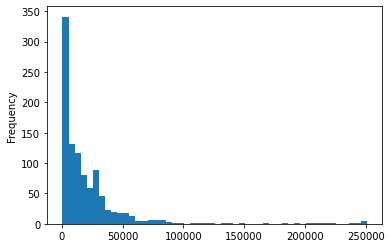

In [66]:
df['GRADES_PK_G'].plot.hist(bins=50)

In [67]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=nan)
imputer = imputer.fit(df[['GRADES_PK_G']])
df['GRADES_PK_G'] = imputer.transform(df[['GRADES_PK_G']])

In [68]:
df.isna().sum()

STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [69]:
df.shape

(1020, 20)

Кодирование признаков и разделение выборки.

In [70]:
le = LabelEncoder()
df['STATE']= le.fit_transform(df['STATE'])

In [71]:
X = df.drop(columns="ENROLL")
y = df["ENROLL"]

Метод опорных векторов

In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [73]:

mse_svr = mean_squared_error(y_test, y_pred)
mse_svr

68949244063.4755

In [74]:
med_svr = median_absolute_error(y_test, y_pred)
med_svr

4652.5

In [75]:
r2_svr = r2_score(y_test, y_pred)
r2_svr

0.9601329071620861

Обучение модели случайного леса и оценка её качества.

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [77]:
mse_rf = mean_squared_error(y_test, y_pred)
mse_rf

500646761.35294116

In [78]:
med_rf = median_absolute_error(y_test, y_pred)
med_rf

2882.0

In [79]:
r2_rf = r2_score(y_test, y_pred)
r2_rf

0.9997105213960651

Сравнение двух моделей

In [88]:
print('SVM:','\n','MSE',mse_svr,  '\n','MED', med_svr, '\n','R2', r2_svr)
print('RandomForest:','\n','MSE',mse_rf,  '\n','MED', med_rf, '\n','R2', r2_rf)

SVM: 
 MSE 68949244063.4755 
 MED 4652.5 
 R2 0.9601329071620861
RandomForest: 
 MSE 500646761.35294116 
 MED 2882.0 
 R2 0.9997105213960651


### Итого
 Обе модели точные, % детерминации очень близок.
 Такая точность обеспечена сильной корреляцией в признаках выборки и маленького обьема выборки.
 Модель случайного леса оказалась все таки немного точнее линейной регрессии